In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pth_in = os.path.join('..', 'data')
pth_data = os.path.join(pth_in, 'modeling', 'predict')
pth_out = os.path.join('..', 'figures')

In [3]:
df_summary = pd.read_csv(os.path.join(pth_in, 'summary.csv'))
name_dict = df_summary.set_index('Source').Name.to_dict()
df_summary

,Source,Name,Species,Trajectory,Age,Description
0,GSE136689,Splanchnic Mesoderm,mmusculus,True,E8.5-9.5,Foregut organogenesis dataset showing interact...
1,GSE162534,Primitive Streak,mmusculus,True,Early-Late Streak,Gastrulation dataset analyzing EMT programs du...
2,GSE201257,Schwann Cell Precursor,mmusculus,True,E9.5-Adult,Neural crest cell atlas describing diversifica...
3,GSE229103,Neuromesodermal Progenitor,mmusculus,True,E8.5,Developmental dataset describing bipotent neur...
4,HCAEmbryonicHindlimb,Embryonic Hindlimb,hsapiens,True,PCW5-9,Embryonic hindlimb atlas focusing on spatial a...
5,rRNAModifications,Cranial Neural Crest,mmusculus,True,E8.5-10.5,Neural crest cell dataset showing the bifurcat...
6,CCCA,Curated Cancer Cell Atlas,hsapiens,False,Primary & Metastatic,Cancer atlas containing 70+ curated single-cel...
7,EMTHallmark,EMT Hallmark,hsapiens,False,NaN,Genes defining epithelial-mesenchymal transiti...
8,TCGA-SKCM,TCGA Melanoma,hsapiens,False,Primary & Metastatic,The Cancer Genome Atlas dataset of cutaneous m...
9,TCGA-LGG,TCGA Low Grade Glioma,hsapiens,False,Primary,The Cancer Genome Atlas dataset of low grade g...


In [4]:
adata = sc.read_h5ad(os.path.join(pth_data, 'training.h5ad'))
adata

AnnData object with n_obs × n_vars = 1575028 × 856
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'trajectory', 'training', 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'plates', 'devtime', 'location', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'CytoTRACE', 'Gut_neuron', 'Sensory', 'Symp', 'enFib', 'ChC', 'Gut_glia', 'NCC', 'Mesenchyme', 'Melanocytes', 'SatGlia', 'SC', 'BCC', 'conflict', 'assignments', 'Hub', 'Hub_leiden', 'total_counts_ribo', 'pct_counts_ribo', 'T+ Sox2+', 'batch', 'percent_mito', 'n_counts', 'bh_pval', 'region', 'tissue', 'adj_stage', 'adj_sample', 'S_score', 'G2M_score', 'phase', 'leiden_R', 'celltype_original', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'RNA_snn_res.0.5', 'ident', 'velocity_self_transition', 'source', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score'

/tmp/ipykernel_2763161/1695416920.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ix = (df_plt.groupby('category')


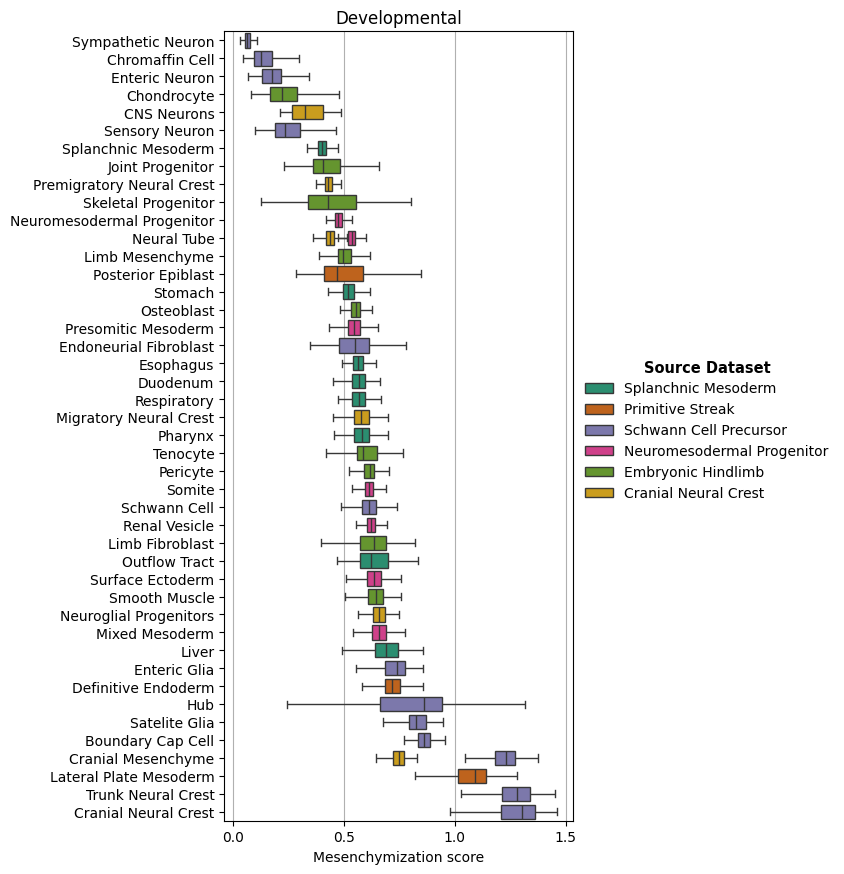

In [5]:
# plot developmental celltypes
fig, ax = plt.subplots(1, 1, figsize = (4.5, 10.25))
dev = (adata.obs.celltype != 'Malignant')
df_plt = adata[dev].obs.copy()
df_plt['hue'] = df_plt.source.map(name_dict)
ix = (df_plt.groupby('category')
      .latent_z.mean()
      .sort_values().index)
sns.boxplot(df_plt,
            x = 'latent_z',
            y = 'category',
            hue = 'hue',
            dodge = False,
            order = ix,
            showfliers = False,
            palette = 'Dark2',
            ax = ax)
leg = ax.legend(title = 'Source Dataset',
                title_fontsize = 10.5,
                bbox_to_anchor = (1., .6),
                frameon = False)
leg.get_title().set_weight('bold')
ax.set_xlabel('Mesenchymization score')
ax.set_ylabel('')
ax.set_title('Developmental')
ax.set_xticks(np.arange(0, 1.51, .5).round(1))
ax.grid(axis = 'x')
fn = os.path.join(pth_out, 'scores_dev.svg')
plt.savefig(fn, bbox_inches = 'tight')

/tmp/ipykernel_2763161/3365570232.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ix = (df_plt.groupby('category')


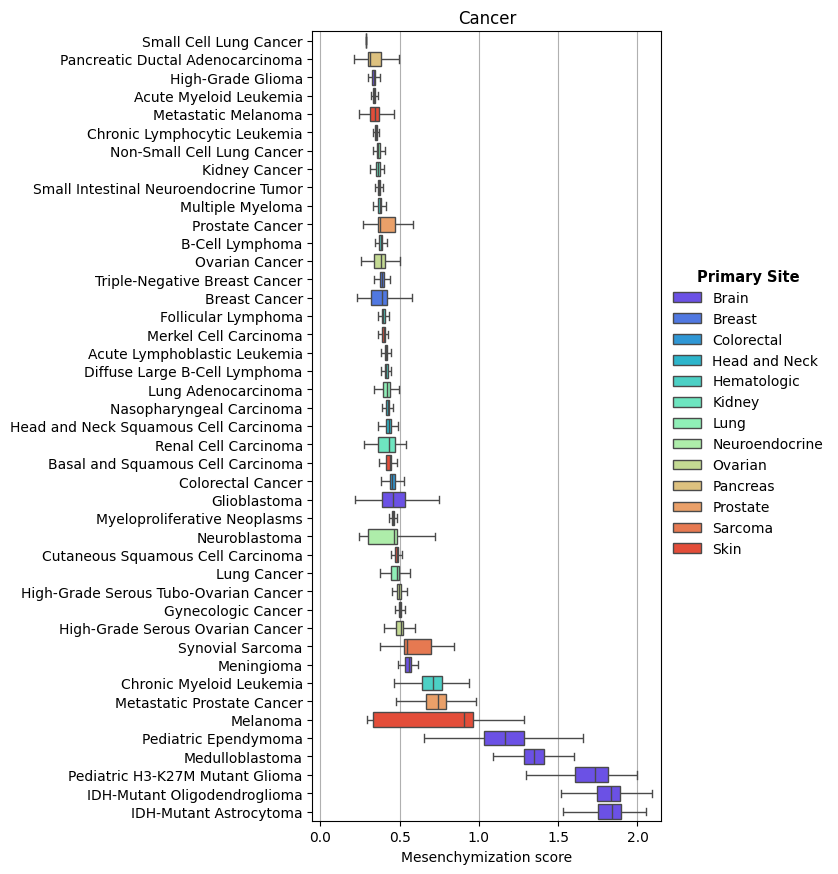

In [6]:
# plot cancer categories
fig, ax = plt.subplots(1, 1, figsize = (4.5, 10.25))
df_plt = adata[~dev].obs.copy()
ix = (df_plt.groupby('category')
      .latent_z.median()
      .sort_values().index)
sns.boxplot(df_plt,
            x = 'latent_z',
            y = 'category',
            hue = 'Category',  # primary site
            dodge = False,
            order = ix,
            showfliers = False,
            palette = 'rainbow',
            ax = ax)
leg = ax.legend(title = 'Primary Site',
                title_fontsize = 10.5,
                bbox_to_anchor = (1.5, .715),
                frameon = False)
leg.get_title().set_weight('bold')
ax.set_xlabel('Mesenchymization score')
ax.set_ylabel('')
ax.set_title('Cancer')
ax.set_xlim([-.05, 2.15])
ax.set_xticks(np.arange(0, 2.1, .5).round(1))
ax.grid(axis = 'x')
fn = os.path.join(pth_out, 'scores_cancer.svg')
plt.savefig(fn, bbox_inches = 'tight')